In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#csv to pd
aapl = pd.read_csv('AAPL.csv')

#compartimentalize - "Adj Close"
date = aapl.Date
_open = aapl.Open
high = aapl.High
low = aapl.Low
pre_close = aapl.Close
volume = aapl.Volume

close = []
for i in range(200, 700):
    close.append(pre_close[i])

#make a counter for shits and gigs
counter = []
for x in range(len(close)):
    counter.append(x)

In [3]:
def maxminavg():
    maxs = []
    maxs_index = []
    mins = []
    mins_index = []
    window = 25
    confidence_window = 25
    prev = 0
    increasing = False
    was_increasing = False
    was_decreasing = False
    increasing_count = 0
    decreasing = False
    decreasing_count = 0
    
    for x in range(len(close) - window):
        
        total = 0
        top = 0
        low = 9999999
        
        for i in range(0, window):
            total = total + close[x + i]
            if close[x + i] > top:
                top = close[x + i]
            if close[x + i] < low:
                low = close[x + i]
            
        current = total / window
        
        if current < prev:
            increasing = False
            increasing_count = 0
            decreaseing_count = decreaseing_count + 1
            if decreaseing_count >= confidence_window:
                decreasing = True
        if current > prev:
            decreasing = False
            decreaseing_count = 0
            increasing_count = increasing_count + 1
            if increasing_count >= confidence_window:
                increasing = True
        
        if was_increasing != increasing:
            maxs.append(top)
            maxs_index.append(x + i)
        if was_decreasing != decreasing:
            mins.append(low)
            mins_index.append(x + i)
        
        prev = current
        was_increasing = increasing
        was_decreaseing = decreasing
    
    return maxs, maxs_index, mins, mins_index

#
#
#
#
#

def maxminslope():
    maxs = []
    maxs_index = []
    mins = []
    mins_index = []
    window = 10
    confidence_window = 10
    prev = 0
    increasing = False
    was_increasing = False
    was_decreasing = False
    increasing_count = 0
    decreasing = False
    decreasing_count = 0
    
    for x in range(len(close) - window):
        
        top = 0
        low = 9999999
        
        for i in range(0, window):
            if close[x + i] > top:
                top = close[x + i]
            if close[x + i] < low:
                low = close[x + i]
            
        current = (close[x + i] - close[x]) / window
        
        if current < prev:
            increasing = False
            increasing_count = 0
            decreaseing_count = decreaseing_count + 1
            if decreaseing_count >= confidence_window:
                decreasing = True
        if current > prev:
            decreasing = False
            decreaseing_count = 0
            increasing_count = increasing_count + 1
            if increasing_count >= confidence_window:
                increasing = True
        
        if was_increasing != increasing:
            maxs.append(top)
            maxs_index.append(x + i)
        if was_decreasing != decreasing:
            mins.append(low)
            mins_index.append(x + i)
        
        prev = current
        was_increasing = increasing
        was_decreaseing = decreasing
    
    return maxs, maxs_index, mins, mins_index

avg_maxs, avg_maxs_index, avg_mins, avg_mins_index = maxminavg()
slope_maxs, slope_maxs_index, slope_mins, slope_mins_index = maxminslope()

<function matplotlib.pyplot.show(*args, **kw)>

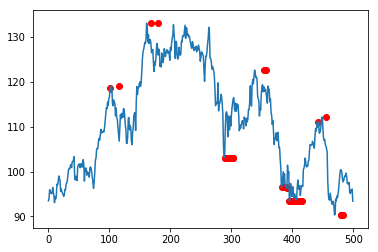

In [4]:
plt.plot(counter, close)
plt.scatter(avg_maxs_index, avg_maxs, c='r')
plt.scatter(avg_mins_index, avg_mins, c='r')
#plt.scatter(slope_maxs_index, slope_maxs, c='r')
#plt.scatter(slope_mins_index, slope_mins, c='r')
plt.show

In [5]:
bought = False
price = 0
profit = 1
i = 0
j = 0

avg_maxs_index.append(0)
avg_mins_index.append(0)

for x in range(len(close)):
    if x == avg_mins_index[i]:
        i = i + 1;
        if bought == False:
            price = close[x]
            bought = True
    if x == avg_maxs_index[j]:
        j = j + 1;
        if bought == True:
            gain = close[x] / price
            profit = profit * gain
            bought = False
    if x == (len(close) - 1):
        if bought:
            gain = close[x] / price
            profit = profit * gain
            bought = False

print('Strategy: ' + str(profit))
print('Hold: ' + str(close[len(close) - 1] / close[0]))

Strategy: 1.1985753745260441
Hold: 0.9991441912983251
